## Explaination

1- Building a model is required to have better prediction performance. From Azure AutoML, the XGBRegressor model showed a promising results with R^2 = 0.93

2- The data were preprocessed as follows:
- All missing values in the target column were deleted.
- Other missing values in the whole dataset were imputed by mean.
- The dataset has only one categorical column "station" was transformed by one hot method.
- All other columns are numerical values, and were transformed using Z-score method.

3- The model was evaluated by cross-validation using three folds and the R^2 values were as follows:
- Cross-Validation Scores: 0.92832466 - 0.92469443 - 0.92360241 with Mean R^2: 0.9255404992513894

4- The final R^2 value of the actual target values against predicted target values is 0.9338155343474194 which is considered very good in comparison to th previous three models.

5- Learning curve were created to understand the learning performance.


In [60]:
import pandas as pd

In [61]:
# Loading the data
temp_df = pd.read_csv("Temperature_Record.csv")

# Reading the first five rows
temp_df.head()

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
0,25,30.5,25.2,49.381596,86.834999,31.687821,25.155560,6.723165,22.406308,0.145575,...,0.002227,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.2713,5652.883301,28.85
1,14,28.8,23.0,46.973965,76.080711,32.331097,24.785722,5.599453,12.216014,0.165552,...,0.000000,0.000000,0.000000,0.000000,37.4967,126.927,30.9680,0.6180,5459.974609,29.00
2,12,26.9,21.2,73.001106,93.047508,26.301507,22.668663,8.127174,52.976091,0.572474,...,0.000000,0.371901,0.192265,9.123485,37.5507,126.988,132.1180,0.5931,5918.901367,23.85
3,24,31.8,27.1,67.480995,88.990639,31.027812,26.944326,7.123845,44.529423,0.174482,...,0.000000,0.000000,0.178007,0.000000,37.5237,126.909,17.2956,0.2223,5306.366211,29.10
4,24,24.8,19.9,79.719048,89.949905,21.023026,16.951494,14.510165,85.830552,0.760021,...,0.403947,1.534074,5.315514,0.815112,37.5237,126.909,17.2956,0.2223,4398.263672,18.95


In [62]:
# Reading the last five rows
temp_df.tail()

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
6582,17,24.7,21.8,53.499859,93.310394,30.789001,21.933232,7.588163,171.251416,0.239633,...,0.000000,0.000000,0.000000,0.0,37.6181,127.099,53.4712,0.6970,5756.279297,26.45
6583,20,31.9,25.7,75.728119,96.866280,27.727631,24.154189,4.958752,53.027428,0.893669,...,1.700342,4.211753,0.330452,0.0,37.6181,127.004,146.5540,4.7296,4854.930664,25.75
6584,24,30.9,21.7,37.068565,76.884262,29.920060,22.716044,5.876675,43.061983,0.035439,...,0.000000,0.000000,0.000000,0.0,37.5237,126.909,17.2956,0.2223,4478.101074,26.70
6585,19,31.1,23.4,53.635799,79.352188,28.804327,23.896702,7.492933,47.301812,0.075245,...,0.000000,0.000000,0.000000,0.0,37.5776,126.938,75.0924,1.7678,5131.667480,25.60
6586,15,31.1,24.0,38.004723,72.211700,35.022643,25.623792,7.162345,33.326221,0.127752,...,0.000000,0.000000,0.000000,0.0,37.5507,126.937,30.0464,0.8552,4843.501953,29.15


In [63]:
#  The data shape
temp_df.shape

(6587, 23)

In [64]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6587 entries, 0 to 6586
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   station                 6587 non-null   int64  
 1   Present_Tmax            6525 non-null   float64
 2   Present_Tmin            6525 non-null   float64
 3   NextDayPred_RHmin       6526 non-null   float64
 4   NextDayPred_RHmax       6526 non-null   float64
 5   NextDayPred_Tmax_lapse  6526 non-null   float64
 6   NextDayPred_Tmin_lapse  6526 non-null   float64
 7   NextDayPred_WS          6526 non-null   float64
 8   NextDayPred_LH          6526 non-null   float64
 9   NextDayPred_CC1         6526 non-null   float64
 10  NexDayPred_CC2          6526 non-null   float64
 11  NextDayPred_CC3         6526 non-null   float64
 12  NextDayPred_CC4         6526 non-null   float64
 13  NextDayPred_PPT1        6526 non-null   float64
 14  NextDayPred_PPT2        6526 non-null   

In [65]:
# Missing Values
temp_df.isna().sum()

station                    0
Present_Tmax              62
Present_Tmin              62
NextDayPred_RHmin         61
NextDayPred_RHmax         61
NextDayPred_Tmax_lapse    61
NextDayPred_Tmin_lapse    61
NextDayPred_WS            61
NextDayPred_LH            61
NextDayPred_CC1           61
NexDayPred_CC2            61
NextDayPred_CC3           61
NextDayPred_CC4           61
NextDayPred_PPT1          61
NextDayPred_PPT2          61
NextDayPred_PPT3          61
NextDayPred_PPT4          61
lat                        0
lon                        0
DEM                        0
Slope                      0
Solar radiation            0
NextDayAvTemp             23
dtype: int64

In [66]:
# Drop missing values from the target column
temp_df.dropna(subset="NextDayAvTemp", inplace=True)

# Checking the results
temp_df.isna().sum()

station                    0
Present_Tmax              53
Present_Tmin              53
NextDayPred_RHmin         61
NextDayPred_RHmax         61
NextDayPred_Tmax_lapse    61
NextDayPred_Tmin_lapse    61
NextDayPred_WS            61
NextDayPred_LH            61
NextDayPred_CC1           61
NexDayPred_CC2            61
NextDayPred_CC3           61
NextDayPred_CC4           61
NextDayPred_PPT1          61
NextDayPred_PPT2          61
NextDayPred_PPT3          61
NextDayPred_PPT4          61
lat                        0
lon                        0
DEM                        0
Slope                      0
Solar radiation            0
NextDayAvTemp              0
dtype: int64

In [67]:
# Impute the missing values with the mean
from sklearn.impute import SimpleImputer

feature_names = temp_df.columns
impute = SimpleImputer(strategy='mean')
temp_df = pd.DataFrame(impute.fit_transform(temp_df), columns = feature_names)

# Checking the results
temp_df.isna().sum()

station                   0
Present_Tmax              0
Present_Tmin              0
NextDayPred_RHmin         0
NextDayPred_RHmax         0
NextDayPred_Tmax_lapse    0
NextDayPred_Tmin_lapse    0
NextDayPred_WS            0
NextDayPred_LH            0
NextDayPred_CC1           0
NexDayPred_CC2            0
NextDayPred_CC3           0
NextDayPred_CC4           0
NextDayPred_PPT1          0
NextDayPred_PPT2          0
NextDayPred_PPT3          0
NextDayPred_PPT4          0
lat                       0
lon                       0
DEM                       0
Slope                     0
Solar radiation           0
NextDayAvTemp             0
dtype: int64

In [68]:
#  The data shape after deleting missing values
temp_df.shape

(6564, 23)

In [69]:
numeric_df = temp_df.drop("station", axis=1)
numeric_df

,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,NexDayPred_CC2,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
0,30.5,25.2,49.381596,86.834999,31.687821,25.155560,6.723165,22.406308,0.145575,0.175032,...,0.002227,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.2713,5652.883301,28.85
1,28.8,23.0,46.973965,76.080711,32.331097,24.785722,5.599453,12.216014,0.165552,0.298164,...,0.000000,0.000000,0.000000,0.000000,37.4967,126.927,30.9680,0.6180,5459.974609,29.00
2,26.9,21.2,73.001106,93.047508,26.301507,22.668663,8.127174,52.976091,0.572474,0.844517,...,0.000000,0.371901,0.192265,9.123485,37.5507,126.988,132.1180,0.5931,5918.901367,23.85
3,31.8,27.1,67.480995,88.990639,31.027812,26.944326,7.123845,44.529423,0.174482,0.259897,...,0.000000,0.000000,0.178007,0.000000,37.5237,126.909,17.2956,0.2223,5306.366211,29.10
4,24.8,19.9,79.719048,89.949905,21.023026,16.951494,14.510165,85.830552,0.760021,0.947244,...,0.403947,1.534074,5.315514,0.815112,37.5237,126.909,17.2956,0.2223,4398.263672,18.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,24.7,21.8,53.499859,93.310394,30.789001,21.933232,7.588163,171.251416,0.239633,0.037009,...,0.000000,0.000000,0.000000,0.000000,37.6181,127.099,53.4712,0.6970,5756.279297,26.45
6560,31.9,25.7,75.728119,96.866280,27.727631,24.154189,4.958752,53.027428,0.893669,0.816048,...,1.700342,4.211753,0.330452,0.000000,37.6181,127.004,146.5540,4.7296,4854.930664,25.75
6561,30.9,21.7,37.068565,76.884262,29.920060,22.716044,5.876675,43.061983,0.035439,0.004111,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,4478.101074,26.70
6562,31.1,23.4,53.635799,79.352188,28.804327,23.896702,7.492933,47.301812,0.075245,0.360216,...,0.000000,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5131.667480,25.60


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(numeric_df)
numeric = pd.DataFrame(numeric, columns=numeric_df.columns)
numeric

,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,NexDayPred_CC2,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
0,0.243551,0.821063,-0.502921,-0.217830,0.701523,0.704269,-0.166442,-1.198829,-0.851914,-0.703622,...,-0.304191,-0.277659,-0.238001,-0.223679,-0.415037,-0.268802,-0.779961,-0.723713,0.727734,0.886514
1,-0.329668,-0.094887,-0.668353,-1.728013,0.920712,0.545560,-0.687084,-1.501514,-0.775401,-0.223137,...,-0.305360,-0.277659,-0.238001,-0.223679,-0.948565,-0.809853,-0.571819,-0.472773,0.279130,0.945965
2,-0.970325,-0.844301,1.120014,0.654569,-1.133800,-0.362936,0.484067,-0.290808,0.783083,1.908836,...,-0.305360,-0.064564,-0.069663,7.590069,0.118491,-0.042316,1.277643,-0.490795,1.346353,-1.095178
3,0.681895,1.612111,0.740718,0.084878,0.476633,1.471885,0.019202,-0.541701,-0.741201,-0.372464,...,-0.305360,-0.277659,-0.082146,-0.223679,-0.415037,-1.036340,-0.821810,-0.759179,-0.078083,0.985599
4,-1.678419,-1.385544,1.581615,0.219584,-2.932380,-2.816353,3.441454,0.685076,1.501376,2.309699,...,-0.093193,0.601347,4.416016,0.474418,-0.415037,-1.036340,-0.821810,-0.759179,-2.189854,-3.037236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,-1.712138,-0.594496,-0.219949,0.691485,0.395261,-0.678533,0.234331,3.222352,-0.491678,-1.242213,...,-0.305360,-0.277659,-0.238001,-0.223679,1.450335,1.354351,-0.160363,-0.415593,0.968179,-0.064698
6560,0.715614,1.029234,1.307391,1.190824,-0.647865,0.274550,-0.983935,-0.289283,2.013241,1.797747,...,0.587720,2.135625,0.051328,-0.223679,1.450335,0.159006,1.541596,2.503192,-1.127886,-0.342135
6561,0.378426,-0.636130,-1.348969,-1.615174,0.099179,-0.342604,-0.558640,-0.585289,-1.273726,-1.370587,...,-0.305360,-0.277659,-0.238001,-0.223679,-0.415037,-1.036340,-0.821810,-0.759179,-2.004194,0.034387
6562,0.445864,0.071650,-0.210608,-1.268613,-0.280993,0.164054,0.190209,-0.459352,-1.121271,0.019002,...,-0.305360,-0.277659,-0.238001,-0.223679,0.650043,-0.671445,0.234967,0.359449,-0.484341,-0.401586


In [71]:
temp_df["station"] = temp_df["station"].astype(str)

In [72]:
from sklearn.preprocessing import OneHotEncoder

# One Hot encoding of categorical variables
OHencoder = OneHotEncoder()

# OHencoder.fit(temp_df[["station"]])
# encodings = OHencoder.transform(temp_df[["station"]]).toarray()
encodings = OHencoder.fit_transform(temp_df[["station"]]).toarray()   # For both previous 2 lines in one line.

# Columns Names
OH_columns = OHencoder.get_feature_names_out()

# Final Data Frame
categorical = pd.DataFrame(encodings, columns=OH_columns)
categorical

,station_1.0,station_10.0,station_11.0,station_12.0,station_13.0,station_14.0,station_15.0,station_16.0,station_17.0,station_18.0,...,station_23.0,station_24.0,station_25.0,station_3.0,station_4.0,station_5.0,station_6.0,station_7.0,station_8.0,station_9.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
temp_df = pd.concat([categorical, numeric], axis=1, join="inner")
temp_df

,station_1.0,station_10.0,station_11.0,station_12.0,station_13.0,station_14.0,station_15.0,station_16.0,station_17.0,station_18.0,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.304191,-0.277659,-0.238001,-0.223679,-0.415037,-0.268802,-0.779961,-0.723713,0.727734,0.886514
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.305360,-0.277659,-0.238001,-0.223679,-0.948565,-0.809853,-0.571819,-0.472773,0.279130,0.945965
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.305360,-0.064564,-0.069663,7.590069,0.118491,-0.042316,1.277643,-0.490795,1.346353,-1.095178
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.305360,-0.277659,-0.082146,-0.223679,-0.415037,-1.036340,-0.821810,-0.759179,-0.078083,0.985599
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.093193,0.601347,4.416016,0.474418,-0.415037,-1.036340,-0.821810,-0.759179,-2.189854,-3.037236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.305360,-0.277659,-0.238001,-0.223679,1.450335,1.354351,-0.160363,-0.415593,0.968179,-0.064698
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.587720,2.135625,0.051328,-0.223679,1.450335,0.159006,1.541596,2.503192,-1.127886,-0.342135
6561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.305360,-0.277659,-0.238001,-0.223679,-0.415037,-1.036340,-0.821810,-0.759179,-2.004194,0.034387
6562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.305360,-0.277659,-0.238001,-0.223679,0.650043,-0.671445,0.234967,0.359449,-0.484341,-0.401586


In [74]:
x = temp_df.drop("NextDayAvTemp", axis=1)
y = pd.DataFrame(temp_df["NextDayAvTemp"])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=10)

In [75]:
from xgboost import XGBRegressor
XGBReg =XGBRegressor(n_estimators=100,learning_rate=0.1, max_depth=9, max_leaves=63)
XGBReg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=63,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
# Cross-Validation 3 folds
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(XGBReg, x_train, y_train, cv=3, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean R squared:", scores.mean())

Cross-Validation Scores: [0.92832466 0.92469443 0.92360241]
Mean R squared: 0.9255404992513894


In [77]:
y_pred = XGBReg.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score for XGBRegressor:", r2)

R-squared score for XGBRegressor: 0.9338155343474194


## Save the Model 

In [78]:
import joblib as job
job.dump(XGBReg, 'Predict_NextDay_Temp.joblib')

['Predict_NextDay_Temp.joblib']

# Learning Curve

In [79]:
from sklearn.model_selection import learning_curve

train_proportions = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75,
                                                                               0.8, 0.85, 0.9, 1]

train_sizes_GB, train_scores, validation_scores = learning_curve(estimator=XGBReg, X=x_train,
                                                                y=y_train.values,
                                                                train_sizes=train_proportions, cv = 5,
                                                                scoring = 'neg_mean_squared_error', random_state=10)

In [80]:
pd.DataFrame(train_scores)

,0,1,2,3,4
0,-0.000073,-0.000078,-0.000078,-0.000078,-0.000078
1,-0.000415,-0.000394,-0.000394,-0.000394,-0.000394
2,-0.001121,-0.001149,-0.001149,-0.001149,-0.001149
3,-0.001888,-0.002079,-0.002079,-0.002079,-0.002079
4,-0.003566,-0.002850,-0.003648,-0.003648,-0.003648
5,-0.004691,-0.004022,-0.004755,-0.004755,-0.004755
6,-0.005635,-0.004842,-0.006389,-0.006389,-0.006389
7,-0.007314,-0.006614,-0.007694,-0.007694,-0.007694
8,-0.009211,-0.007893,-0.009653,-0.009653,-0.009653
9,-0.009729,-0.009720,-0.010701,-0.009837,-0.009837


In [81]:
pd.DataFrame(validation_scores)

,0,1,2,3,4
0,-0.178374,-0.190499,-0.188707,-0.186134,-0.178915
1,-0.147323,-0.155589,-0.162173,-0.163252,-0.144017
2,-0.135835,-0.132250,-0.144289,-0.139497,-0.127820
3,-0.124616,-0.119801,-0.122876,-0.122227,-0.117058
4,-0.117785,-0.107093,-0.114439,-0.120826,-0.110165
5,-0.108539,-0.108505,-0.103281,-0.106312,-0.098799
6,-0.101497,-0.097998,-0.100493,-0.100357,-0.092713
7,-0.095641,-0.095507,-0.096504,-0.092262,-0.090648
8,-0.090146,-0.090186,-0.095217,-0.089111,-0.087616
9,-0.087695,-0.089699,-0.087366,-0.082612,-0.082199


In [82]:
train_scores_mean_GB = -train_scores.mean(axis = 1)
train_scores_mean_GB

array([7.69067949e-05, 3.98435492e-04, 1.14339715e-03, 2.04056302e-03,
       3.47214973e-03, 4.59552456e-03, 5.92852202e-03, 7.40215787e-03,
       9.21253096e-03, 9.96481619e-03, 1.13295696e-02, 1.21348963e-02,
       1.29818494e-02, 1.41742821e-02, 1.56002378e-02, 1.59623666e-02,
       1.70185747e-02, 1.84952351e-02])

In [83]:
validation_scores_mean_GB = -validation_scores.mean(axis = 1)
validation_scores_mean_GB

array([0.18452598, 0.15447084, 0.13593803, 0.1213156 , 0.11406177,
       0.10508714, 0.09861164, 0.09411231, 0.09045516, 0.08591402,
       0.08365766, 0.08068089, 0.07807607, 0.07543331, 0.07544305,
       0.07296501, 0.07305148, 0.07096614])

R-squared score for XGBRegressor: 0.9338155343474194


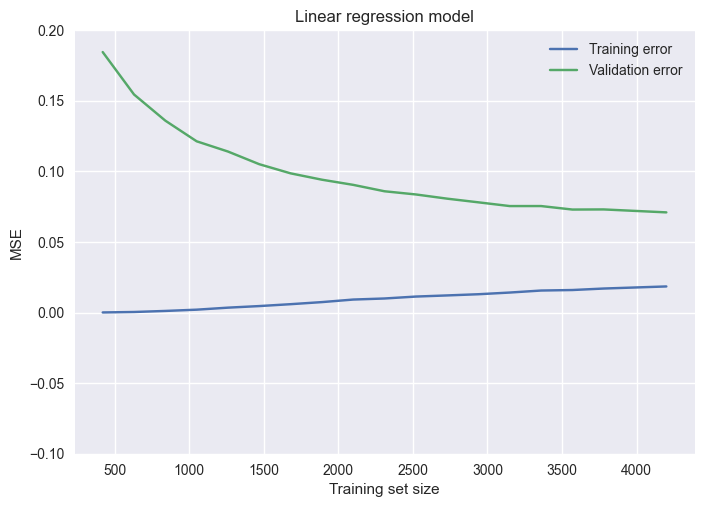

In [84]:
import matplotlib.pyplot as plt

def learning_curves(train_sizes, train_scores_means, validation_scores_means, title):
    plt.style.use('seaborn-v0_8')
    plt.plot(train_sizes, train_scores_means, label = 'Training error')
    plt.plot(train_sizes, validation_scores_means, label = 'Validation error')
    plt.ylabel('MSE')
    plt.xlabel('Training set size')
    plt.title(title)
    plt.ylim(-0.1, 0.2)
    plt.legend()

learning_curves(train_sizes_GB, train_scores_mean_GB, validation_scores_mean_GB, 'Linear regression model')

print("R-squared score for XGBRegressor:", r2)

## Preprocessing Unseen Data

In [85]:
# Loading the data
unseen_df = pd.read_csv("Unseen_test.csv")

# Reading the first five rows
unseen_df.head()

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
0,22,27.6,23.8,82.659302,98.173332,25.880775,23.297214,10.177009,69.724832,0.814371,...,5.296227,3.557506,0.000000,0.070359,37.5102,127.086,21.9668,0.1332,5841.537598,25.50
1,19,29.4,23.5,65.926697,82.918251,29.571686,25.658716,10.119713,29.588685,0.233663,...,0.000000,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5692.742676,27.35
2,6,35.7,27.7,42.154407,74.213478,34.502823,26.153486,6.213467,71.456794,0.000000,...,0.000000,0.000000,0.019931,0.000000,37.5102,127.042,54.6384,0.1457,4764.229492,30.45
3,10,31.9,24.9,49.132504,86.906128,31.680390,25.743212,6.933404,70.164116,0.087613,...,0.000000,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5052.172363,28.15
4,5,30.2,26.4,87.027557,96.315842,27.319403,24.987842,6.712139,40.962481,0.880547,...,0.057034,4.497195,1.808847,0.161392,37.5507,127.135,35.0380,0.5055,5566.146973,27.35


In [86]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   station                 1163 non-null   int64  
 1   Present_Tmax            1155 non-null   float64
 2   Present_Tmin            1155 non-null   float64
 3   NextDayPred_RHmin       1149 non-null   float64
 4   NextDayPred_RHmax       1149 non-null   float64
 5   NextDayPred_Tmax_lapse  1149 non-null   float64
 6   NextDayPred_Tmin_lapse  1149 non-null   float64
 7   NextDayPred_WS          1149 non-null   float64
 8   NextDayPred_LH          1149 non-null   float64
 9   NextDayPred_CC1         1149 non-null   float64
 10  NexDayPred_CC2          1149 non-null   float64
 11  NextDayPred_CC3         1149 non-null   float64
 12  NextDayPred_CC4         1149 non-null   float64
 13  NextDayPred_PPT1        1149 non-null   float64
 14  NextDayPred_PPT2        1149 non-null   

In [87]:
unseen_df.isna().sum()

station                    0
Present_Tmax               8
Present_Tmin               8
NextDayPred_RHmin         14
NextDayPred_RHmax         14
NextDayPred_Tmax_lapse    14
NextDayPred_Tmin_lapse    14
NextDayPred_WS            14
NextDayPred_LH            14
NextDayPred_CC1           14
NexDayPred_CC2            14
NextDayPred_CC3           14
NextDayPred_CC4           14
NextDayPred_PPT1          14
NextDayPred_PPT2          14
NextDayPred_PPT3          14
NextDayPred_PPT4          14
lat                        0
lon                        0
DEM                        0
Slope                      0
Solar radiation            0
NextDayAvTemp              4
dtype: int64

In [88]:
# Drop missing values from the target column
unseen_df.dropna(subset="NextDayAvTemp", inplace=True)

# Checking the results
unseen_df.isna().sum()

station                    0
Present_Tmax               7
Present_Tmin               7
NextDayPred_RHmin         14
NextDayPred_RHmax         14
NextDayPred_Tmax_lapse    14
NextDayPred_Tmin_lapse    14
NextDayPred_WS            14
NextDayPred_LH            14
NextDayPred_CC1           14
NexDayPred_CC2            14
NextDayPred_CC3           14
NextDayPred_CC4           14
NextDayPred_PPT1          14
NextDayPred_PPT2          14
NextDayPred_PPT3          14
NextDayPred_PPT4          14
lat                        0
lon                        0
DEM                        0
Slope                      0
Solar radiation            0
NextDayAvTemp              0
dtype: int64

In [89]:
# Impute the missing values with the mean
from sklearn.impute import SimpleImputer

feature_names = unseen_df.columns
impute = SimpleImputer(strategy='mean')
unseen_df = pd.DataFrame(impute.fit_transform(unseen_df), columns = feature_names)

# Checking the results
unseen_df.isna().sum()

station                   0
Present_Tmax              0
Present_Tmin              0
NextDayPred_RHmin         0
NextDayPred_RHmax         0
NextDayPred_Tmax_lapse    0
NextDayPred_Tmin_lapse    0
NextDayPred_WS            0
NextDayPred_LH            0
NextDayPred_CC1           0
NexDayPred_CC2            0
NextDayPred_CC3           0
NextDayPred_CC4           0
NextDayPred_PPT1          0
NextDayPred_PPT2          0
NextDayPred_PPT3          0
NextDayPred_PPT4          0
lat                       0
lon                       0
DEM                       0
Slope                     0
Solar radiation           0
NextDayAvTemp             0
dtype: int64

In [90]:
numeric_df = unseen_df.drop("station", axis=1)
numeric_df

,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,NexDayPred_CC2,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
0,27.6,23.8,82.659302,98.173332,25.880775,23.297214,10.177009,69.724832,0.814371,0.828351,...,5.296227,3.557506,0.000000,0.070359,37.5102,127.086,21.9668,0.1332,5841.537598,25.50
1,29.4,23.5,65.926697,82.918251,29.571686,25.658716,10.119713,29.588685,0.233663,0.452573,...,0.000000,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5692.742676,27.35
2,35.7,27.7,42.154407,74.213478,34.502823,26.153486,6.213467,71.456794,0.000000,0.013791,...,0.000000,0.000000,0.019931,0.000000,37.5102,127.042,54.6384,0.1457,4764.229492,30.45
3,31.9,24.9,49.132504,86.906128,31.680390,25.743212,6.933404,70.164116,0.087613,0.107539,...,0.000000,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5052.172363,28.15
4,30.2,26.4,87.027557,96.315842,27.319403,24.987842,6.712139,40.962481,0.880547,0.824955,...,0.057034,4.497195,1.808847,0.161392,37.5507,127.135,35.0380,0.5055,5566.146973,27.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,32.5,22.8,41.989902,67.818542,30.760457,24.287911,6.741054,48.323152,0.053411,0.147240,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5825.258301,26.70
1155,31.1,18.9,39.382179,78.035172,29.107004,21.306848,5.165246,89.463721,0.267866,0.301568,...,0.000000,0.000000,0.000000,0.007526,37.5507,127.135,35.0380,0.5055,5818.317383,25.10
1156,32.5,23.5,54.377689,83.143707,32.920552,25.369539,5.201242,92.720334,0.047834,0.121767,...,0.000000,0.000000,0.701467,0.092443,37.4697,126.995,82.2912,2.2579,4861.894043,28.55
1157,32.6,20.7,37.920181,77.275185,33.550047,24.529717,6.451454,71.790871,0.009318,0.015765,...,0.000000,0.000000,0.000000,0.000000,37.5372,127.085,28.7000,0.6233,5795.268066,27.90


In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(numeric_df)
numeric = pd.DataFrame(numeric, columns=numeric_df.columns)
numeric

,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,NexDayPred_CC2,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
0,-0.732905,0.246180,1.751855,1.345734,-1.270674,-0.086813,1.366911,0.277258,1.705080,1.821388,...,2.334585,1.837216,-0.262393,-0.181027,-0.711141,1.206413,-0.732152,-0.806962,1.150892,-0.413295
1,-0.112167,0.120860,0.610916,-0.730956,0.008693,0.925311,1.340875,-0.957315,-0.527958,0.365822,...,-0.315512,-0.276014,-0.262393,-0.235935,0.664785,-0.681608,0.289008,0.446200,0.799355,0.313101
2,2.060413,1.875339,-1.010035,-1.915945,1.717955,1.137366,-0.434194,0.330532,-1.426480,-1.333789,...,-0.315512,-0.276014,-0.244594,-0.235935,-0.711141,0.645109,-0.104151,-0.797379,-1.394309,1.530306
3,0.749968,0.705686,-0.534222,-0.188082,0.739626,0.961526,-0.107042,0.290770,-1.089574,-0.970658,...,-0.315512,-0.276014,-0.262393,-0.235935,-1.813514,-0.464741,2.853453,3.060775,-0.714028,0.627218
4,0.163716,1.332286,2.049711,1.092872,-0.772007,0.637779,-0.207588,-0.607461,1.959554,1.808234,...,-0.286974,2.395409,1.352955,-0.109985,0.115639,1.831500,-0.480902,-0.521539,0.500266,0.313101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,0.956880,-0.171553,-1.021252,-2.786494,0.420753,0.337793,-0.194449,-0.381050,-1.221093,-0.816876,...,-0.315512,-0.276014,-0.262393,-0.235935,-0.435547,-1.051558,-0.821940,-0.738654,1.112431,0.057881
1155,0.474084,-1.800712,-1.199063,-1.395694,-0.152378,-0.939870,-0.910525,0.884418,-0.396435,-0.219091,...,-0.315512,-0.276014,-0.262393,-0.230062,0.115639,1.831500,-0.480902,-0.521539,1.096033,-0.570354
1156,0.956880,0.120860,-0.176571,-0.700264,1.169499,0.801372,-0.894168,0.984591,-1.242539,-0.915548,...,-0.315512,-0.276014,0.364036,-0.163792,-1.537921,0.045535,0.427381,0.821934,-1.163571,0.784277
1157,0.991366,-1.048793,-1.298752,-1.499152,1.387698,0.441430,-0.326048,0.340808,-1.390649,-1.326143,...,-0.315512,-0.276014,-0.262393,-0.235935,-0.159954,1.193656,-0.602729,-0.431228,1.041577,0.529057


In [92]:
unseen_df["station"] = unseen_df["station"].astype(str)

from sklearn.preprocessing import OneHotEncoder

# One Hot encoding of categorical variables
OHencoder = OneHotEncoder()

# OHencoder.fit(temp_df[["station"]])
# encodings = OHencoder.transform(temp_df[["station"]]).toarray()
encodings = OHencoder.fit_transform(unseen_df[["station"]]).toarray()   # For both previous 2 lines in one line.

# Columns Names
OH_columns = OHencoder.get_feature_names_out()

# Data Frame
categorical = pd.DataFrame(encodings, columns=OH_columns)
categorical

,station_1.0,station_10.0,station_11.0,station_12.0,station_13.0,station_14.0,station_15.0,station_16.0,station_17.0,station_18.0,...,station_23.0,station_24.0,station_25.0,station_3.0,station_4.0,station_5.0,station_6.0,station_7.0,station_8.0,station_9.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Final Data Frame
unseen_df = pd.concat([categorical, numeric], axis=1, join="inner")
unseen_df

,station_1.0,station_10.0,station_11.0,station_12.0,station_13.0,station_14.0,station_15.0,station_16.0,station_17.0,station_18.0,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.334585,1.837216,-0.262393,-0.181027,-0.711141,1.206413,-0.732152,-0.806962,1.150892,-0.413295
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.315512,-0.276014,-0.262393,-0.235935,0.664785,-0.681608,0.289008,0.446200,0.799355,0.313101
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.315512,-0.276014,-0.244594,-0.235935,-0.711141,0.645109,-0.104151,-0.797379,-1.394309,1.530306
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.315512,-0.276014,-0.262393,-0.235935,-1.813514,-0.464741,2.853453,3.060775,-0.714028,0.627218
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.286974,2.395409,1.352955,-0.109985,0.115639,1.831500,-0.480902,-0.521539,0.500266,0.313101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.315512,-0.276014,-0.262393,-0.235935,-0.435547,-1.051558,-0.821940,-0.738654,1.112431,0.057881
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.315512,-0.276014,-0.262393,-0.230062,0.115639,1.831500,-0.480902,-0.521539,1.096033,-0.570354
1156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.315512,-0.276014,0.364036,-0.163792,-1.537921,0.045535,0.427381,0.821934,-1.163571,0.784277
1157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.315512,-0.276014,-0.262393,-0.235935,-0.159954,1.193656,-0.602729,-0.431228,1.041577,0.529057


## Testing the Model on unseen data

In [94]:
unseen_x = unseen_df.drop("NextDayAvTemp", axis=1)
unseen_y = pd.DataFrame(unseen_df["NextDayAvTemp"])

In [95]:
# Load the saved Model

loaded_model = job.load("Predict_NextDay_Temp.joblib")

In [96]:
# Make the prediction

unseen_y_pred = loaded_model.predict(unseen_x)

In [97]:
from sklearn.metrics import r2_score
r2 = r2_score(unseen_y, unseen_y_pred)
print("R-squared score for XGBRegressor:", r2)

R-squared score for XGBRegressor: 0.9373104338934785
